In [1]:
#load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing, tree, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#install dataset package
!pip install --quiet dmba
import dmba

import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 11.8 MB 5.3 MB/s 
no display found. Using non-interactive Agg backend


In [2]:
# df = dmba.data.load_data('UniversalBank.csv') #loads to a pandas data frame
# bank_df = df.drop(columns=['ID', 'ZIP Code'])
# Xt, y = bank_df.drop(columns=['Personal Loan']), bank_df['Personal Loan']

# Xt['Education'] = Xt['Education'].astype('category')
# Xt.Education = Xt.Education.cat.rename_categories({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'})#rename education labels to actual categories

# #dummy code categorical attributes and prepare data
# ohXtEdu = pd.get_dummies(Xt['Education'],drop_first=True) #one hot encode and drop the first column
# X = pd.concat([Xt.drop('Education', axis=1), ohXtEdu], axis=1)
# X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Graduate,Professional
0,25,1,49,4,1.6,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0


In [54]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

X, y = iris['data'], iris['target']

In [55]:


df = pd.DataFrame(X, columns=iris['feature_names'])
df['y'] = y

df['y'] = df['y'].astype('category')
df['y_name'] = df['y'].cat.rename_categories( dict(enumerate(iris['target_names'].tolist())) )

X = df.iloc[:, :4]
y = df.iloc[:, 4]
y_name = df.iloc[:, 5]

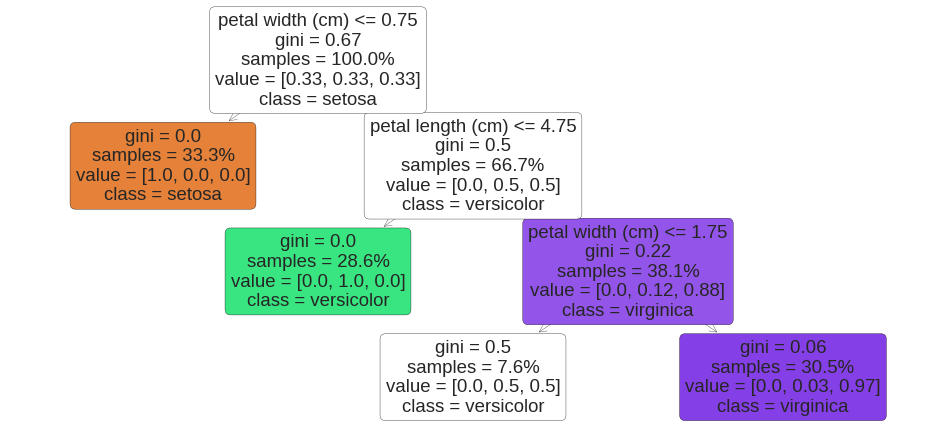

In [27]:
#run decision tree
dt = DecisionTreeClassifier(max_depth=3, min_samples_split = 20)
dt.fit(X_train, y_train)

#plot decision tree
plt.figure(figsize=(15,7), dpi= 80)
a = tree.plot_tree(dt, proportion=True, rounded=True, precision=2, filled=True, 
                   feature_names=iris['feature_names'], class_names=iris['target_names'])

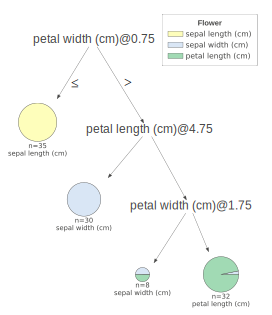

In [28]:
!pip install --quiet dtreeviz
from dtreeviz.trees import *

viz = dtreeviz(dt,X_train,y_train,target_name='Flower',class_names=iris['feature_names'],fancy=False,feature_names=X_train.columns,fontname='DejaVu Sans')
viz

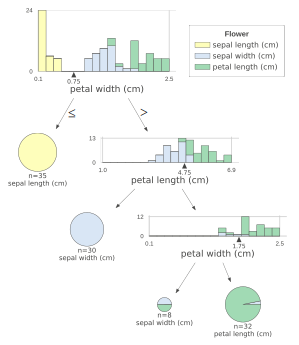

In [29]:
viz = dtreeviz(dt,X_train,y_train,target_name='Flower',class_names=iris['feature_names'],
               fancy=True,feature_names=X_train.columns,fontname='DejaVu Sans')
viz

['sepal length (cm)', 'sepal width (cm)']

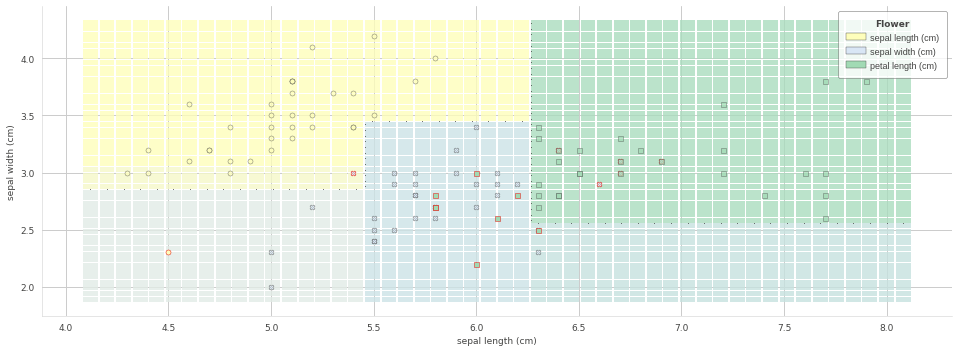

In [35]:
from dtreeviz import clfviz

#view decision boundary (DT using 2 columns)
cols = X_train.columns.tolist()[:2]
dt2col = DecisionTreeClassifier(max_depth=3, min_samples_split = 20)
dt2col.fit(X_train[cols].values, y_train)

plt.figure(figsize=(15,5))
p=clfviz(dt2col, X_train[cols].values, y_train, feature_names=cols, markers=['o','X','s','D'], target_name='Flower', class_names=iris['feature_names'], 
         fontname='DejaVu Sans', ax=plt.gca())
plt.tight_layout()
plt.show()

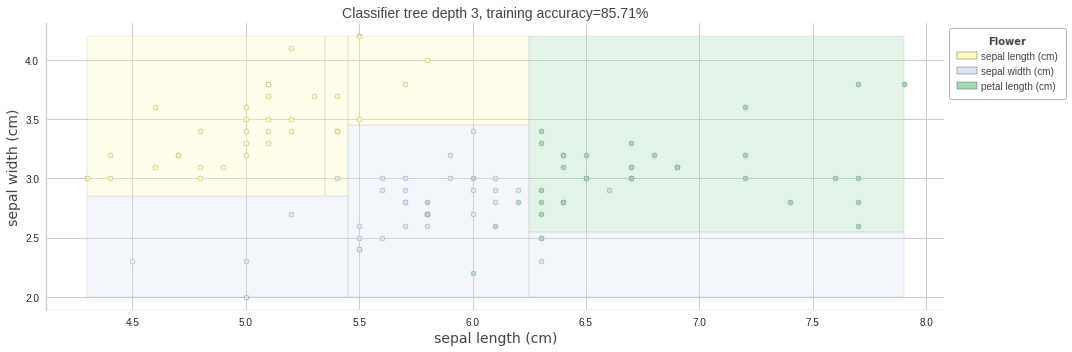

In [37]:
#bivariate plot with DT using 2 columns
cols = X_train.columns.tolist()[:2]
dt2col = DecisionTreeClassifier(max_depth=3, min_samples_split = 20)
dt2col.fit(X_train[cols].values, y_train)

plt.figure(figsize=(15,5))
ct = ctreeviz_bivar(dt2col, X_train[cols].values, y_train,feature_names=cols,target_name='Flower', class_names=iris['feature_names'], 
                    fontname='DejaVu Sans', ax=plt.gca())
plt.tight_layout()
plt.show()

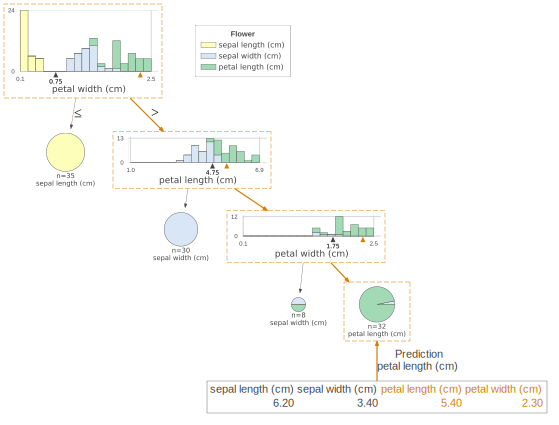

In [39]:
#view specific test cases (index 0)
viz = dtreeviz(dt,X_train,y_train,target_name='Flower',class_names=iris['feature_names'],feature_names=X_train.columns, X=X_test.iloc[0,:], fontname='DejaVu Sans')
viz

In [47]:
X_test.shape

(45, 4)

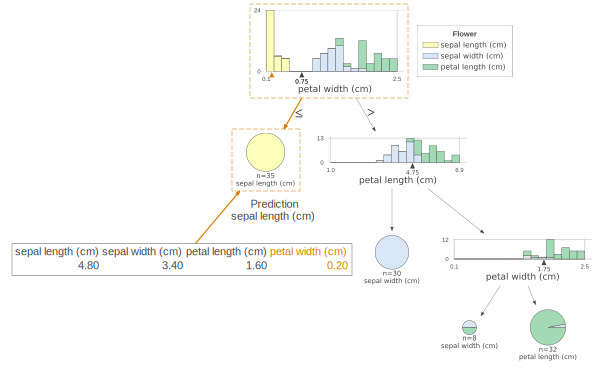

In [48]:
  #view specific test cases (index 65)
viz = dtreeviz(dt,
               X_train,
               y_train,
               target_name='Flower',
               class_names=iris['feature_names'],
               feature_names=X_train.columns, 
               X=X_test.iloc[30,:], 
               fontname='DejaVu Sans')
viz

In [49]:
!pip install --quiet yellowbrick
!pip install --quiet -U yellowbrick

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, PrecisionRecallCurve, DiscriminationThreshold
from yellowbrick.model_selection import RFECV, CVScores, ValidationCurve, LearningCurve
from yellowbrick.model_selection import feature_importances

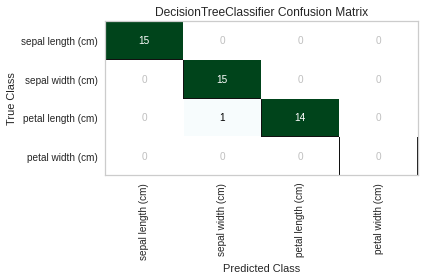

In [51]:
#overall model summary
viz = ConfusionMatrix(dt, classes=iris['feature_names'], cmap='BuGn', is_fitted=True)
#viz.fit(X_train, y_train) #set is_fitted = False, if the data has to be fit again using the yellowbrick class     
viz.score(X_test, y_test)
p=viz.show() 

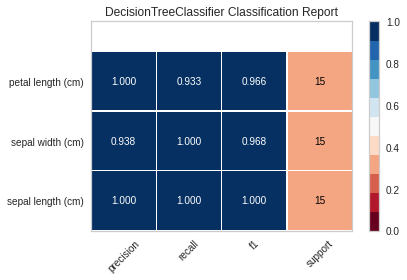

In [52]:
viz = ClassificationReport(dt, classes=iris['feature_names'], support=True, cmap='RdBu', is_fitted=True)
#viz.fit(X_train, y_train)   #set is_fitted = False, if the data has to be fit again using the yellowbrick class     
viz.score(X_test, y_test) 
p=viz.show()

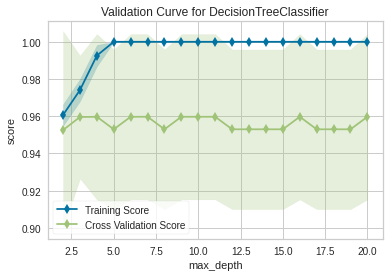

In [56]:
#select parameters
viz = ValidationCurve(DecisionTreeClassifier(), param_name="max_depth", param_range=np.arange(2, 21), cv=StratifiedKFold(n_splits=10), scoring="f1_weighted")
viz.fit(X, y)
p=viz.show() 

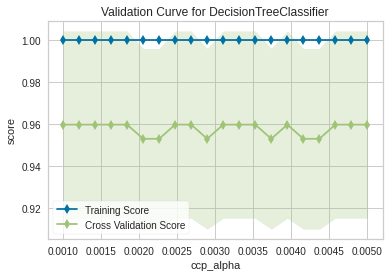

In [57]:
#select parameters
viz = ValidationCurve(DecisionTreeClassifier(), param_name="ccp_alpha", param_range=np.linspace(0.001, 0.005, 20), cv=StratifiedKFold(n_splits=10), scoring="f1_weighted")
viz.fit(X, y)
p=viz.show() 

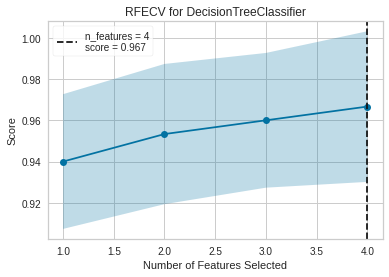

In [58]:
#recursive feature elimination
viz = RFECV(DecisionTreeClassifier())
viz.fit(X, y)   
p=viz.show() 

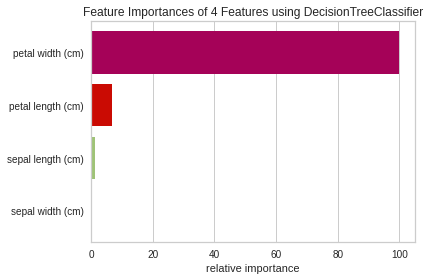

In [59]:
#feature importance
v=feature_importances(DecisionTreeClassifier(), X, y)
p=v.show()

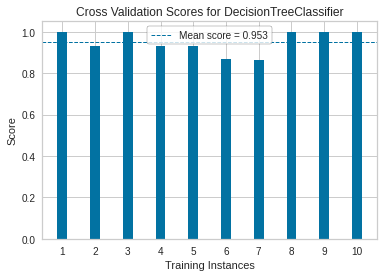

In [60]:
#cv - individual fold results
Xs, ys = X[0:300], y[0:300]
viz = CVScores(DecisionTreeClassifier(max_depth=2), cv=StratifiedKFold(n_splits=10), scoring='f1_weighted')
viz.fit(Xs, ys) 
p=viz.show() 

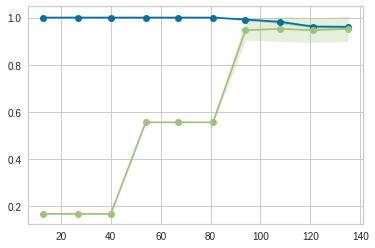

In [61]:
#fit learning curves
Xs, ys = X[0:1000], y[0:1000]
visualizer = LearningCurve(DecisionTreeClassifier(max_depth=2), cv=StratifiedKFold(n_splits=10), scoring='f1_weighted', train_sizes=np.linspace(0.1, 1, 10))
visualizer.fit(Xs, ys) 
p=viz.show() 

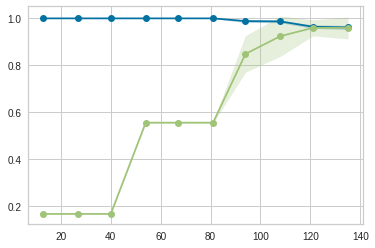

In [62]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
#fit learning curves
Xs, ys = X[0:1000], y[0:1000]
visualizer = LearningCurve(RandomForestClassifier(n_estimators=30, max_depth=2), cv=StratifiedKFold(n_splits=10), scoring='f1_weighted', train_sizes=np.linspace(0.1, 1, 10))
visualizer.fit(Xs, ys) 
p=viz.show() 

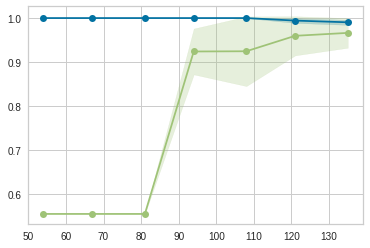

In [63]:
Xs, ys = X[0:1000], y[0:1000]
visualizer = LearningCurve(GradientBoostingClassifier(n_estimators=30, max_depth=2), cv=StratifiedKFold(n_splits=10), scoring='f1_weighted', train_sizes=np.linspace(0.1, 1, 10))
visualizer.fit(Xs, ys) 
p=viz.show() 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

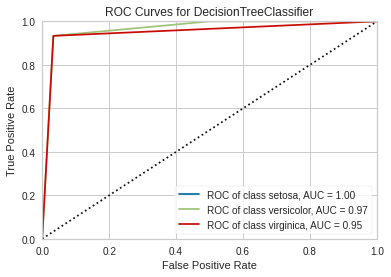

In [67]:
#roc curve
viz = ROCAUC(DecisionTreeClassifier(max_depth=2), classes=iris['target_names'], micro=False, macro=False)
viz.fit(X_train, y_train)        
viz.score(X_test, y_test) 
p=viz.show() 

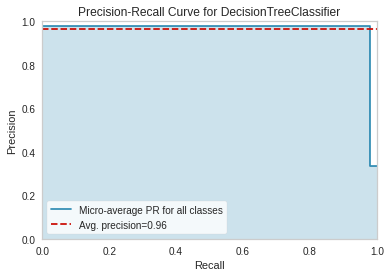

In [68]:
#pr curve
viz = PrecisionRecallCurve(DecisionTreeClassifier(max_depth=5, random_state=12))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
p=viz.show()

In [69]:
viz = DiscriminationThreshold(DecisionTreeClassifier(max_depth = 6, random_state=12), cv=StratifiedKFold(n_splits=3), random_state=12)
viz.fit(X, y)  
p=viz.show()

YellowbrickValueError: ignored